# Exercise 01: One Neuron

## Goal

In this exercise you will create a model that predicts the body height of a person from the length of his legs. The lengths of the legs and the body height of 50 persons have been measured and are available in a csv file. We assume a linear relation between the length of the leg and the body height.

You will build the most simple neural network consisting of just one neuron do do a linear regression to fit the data. You will then use the model to make predictions.

What you will learn in the exercise:

* How to **load data** from a table in a csv-file
* How to **access** the loaded data
* How to **display and plot** the data for inspection
* How to use keras to **build a fully connected neural network** (the most simple possible in this case)
* How to set the **optimizer** and some **hyperparameters**
* How to **train** the network
* How to **plot the loss** per epoch and a **metric** to evaluate the model
* How to use the trained model to **make predictions**

You can build on this when you are creating more complex models later.

## Exercise

Write the code in the empty cells below, following the instructions and execute them. The cells that are already filled in, you just have to execute (shift + enter).

The next cell switches of warnings, so that we do not get distracted by them. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

We import the python modules we will use in the exercise.

* **keras:** Create and use ANNs.
* **pyplot:** Create plots.
* **pandas:** Data analysis, we use it to handle the input data, that comes as a table in a csv-file
* **numpy:** Multidimensional arrays

The ``as``keyword is used to rename the module, so that we do not have to write the long name when we use it.

We format the output of numbers to a precision of 3 digits and suppress the usage of scientific notation.

We print the version number of keras (for debugging purposes, in case we will encounter errors)

In [2]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=3, suppress=True)
print(keras.__version__)

2024-06-05 21:29:44.570029: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-05 21:29:45.022754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 21:29:45.793510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


3.3.3


## Exercise. 1.1

We can use pandas to read from a local file or from an url. The commands is:

* ```pd.read_csv(pathOrURL)```

In the next cell load the file ``leg.csv`` from the url: https://dev.mri.cnrs.fr/attachments/download/3341/leg.csv

Once the data loaded, display a part of it. You can display the first or last n lines of the table using the commands:

* ```data.head(n)```
* ```data.tail(n)```

In [3]:
data = pd.read_csv("https://dev.mri.cnrs.fr/attachments/download/3341/leg.csv")
data.head(10)

Sample  Nr  Length  Height
0    Leg   1   58.42  102.87
1    Leg   2   50.80  101.60
2    Leg   3   53.34  100.33
3    Leg   4   50.80  101.60
4    Leg   5   50.80   99.06
5    Leg   6   53.34  101.60
6    Leg   7   55.88  109.22
7    Leg   8   53.34  104.14
8    Leg   9   50.80  105.41
9    Leg  10   55.88  111.76

## Exercise 1.2

Plot the height on the y-axis against the length on the x-axis, to see how the points are distributed.

You can access a column in the table using ```data['column_name']```. The command to create a plot containing points is 

```plt.plot(X, Y, 'ro')```

The command to display a plot is ```plt.show```.

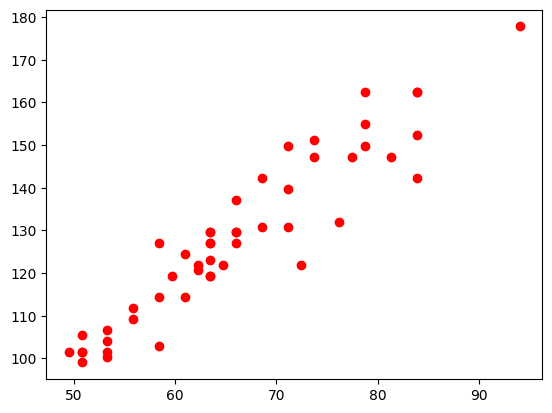

In [8]:
plt.plot(data['Length'], data['Height'], 'ro')
plt.show()

## Exercise 1.3

Now that we have loaded and inspected the data, we will create the neural network. 

Use ```keras.Sequential(list_of_layers)``` to create the the network and assign it to the variable ```model```. To create a fully connected network we use dense layers. A dense layer is created with 

<code>
   keras.layers.Dense(units=nr_of_units_in_the_layer, 
                      input_shape=list_of_input_size_per_dimension,
                      activation="name_of_the_activation_function")
</code>


The input is a single number in our case. Since we do regression, we use the linear activation function.

Use ```model.summary()``` to display a summary of the model.

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1], activation="linear")])    
model.summary()

## Exercise 1.4

Compile the model and set the optimizer, the loss function and an additional metric, to validate the model.
First create an Adam optimizer using 

```keras.optimizer.Name_Of_The_Optimizer(learning_rate=rate)``` and assign it to a variable ```opt```.

Use the ```"mean_square_error"``` as loss function and let the model calculate the additional ```"R2Score"``` metric.

The command to compile the model is:

```model.compile(optimizer=opt, loss='name_of_loss_function', metrics=list_of_metrics)```

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.04)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['R2Score'])

## Exercise 1.5

Now train the model with the input data. The input data is the length column of the table and the corresponding ground truth data is the height column. The command to train the model is:

```model.fit(input_data, ground_truth_data, epochs=nr_of_epochs)```

Assign the result of the fit to a variable ```history```, so that we can plot the loss and the R2Score later.

In [ ]:
history = model.fit(data['Length'], data['Height'], epochs=60)

We plot the loss per epoch.

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

We plot the R2 score per epoch.

In [ ]:
plt.plot(history.history['R2Score'])
plt.title('R2 score')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

We plot the data points like before and add the learned linear model.

In [ ]:
plt.plot(data['Length'], data['Height'], 'ro', data['Length'], model.predict(data['Length']), '-')
plt.show()

## Exercise 1.6

Use the trained model to predict the body heights for the leg lengths 30, 75 and 110. The command is

```model.predict(values)```, where values is a numpy array that can be created from a list of values with ```np.array(list_of_Values)```.

In [ ]:
model.predict(np.array([30, 75, 110]))